In [1]:
#pip install beautifulsoup4

In [2]:
#pip install textblob

# Data Extraction from Yelp

In [92]:
import requests
import pandas as pd

# Set up Yelp API credentials
API_KEY= "NYWTVCUfPZHFHUmcgf0aKutVsq-u-Q4nDvgkYe59u6BAfZ8Q9EtUuGBVop1L_DlpN0AATXpfFsrohOkECyiPHyxv9YFB7xQpaXGi99YJjajy5QPnH8A1W_qD_9TnZXYx"
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
REVIEW_PATH = '/v3/businesses/{}/reviews'

# Function to make API request
def yelp_request(path, api_key, url_params=None):
    url = f"{API_HOST}{path}"
    headers = {
        'Authorization': f'Bearer {api_key}',
    }
    response = requests.get(url, headers=headers, params=url_params)
    return response.json()

# Function to search for restaurants
def search_restaurants(api_key, term='restaurants', location='New York', offset=0):
    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': 50,  # Limit to 50 results per request
        'offset': offset,  # Specify the offset to retrieve different sets of results
        'categories': 'restaurants',  
        'price': '1,2,3,4',  # Filter by price level: 1 (cheap) to 4 (expensive)
    }
    return yelp_request(SEARCH_PATH, api_key, url_params)

# Function to get reviews for a restaurant
def get_reviews(api_key, business_id):
    return yelp_request(REVIEW_PATH.format(business_id), api_key)

# Extract restaurant data
restaurant_data = search_restaurants(API_KEY)
businesses = restaurant_data['businesses']

# Extract reviews for each restaurant
restaurant_info = []
for business in businesses:
    # Extract reviews
    reviews = get_reviews(API_KEY, business['id'])
    # Extract additional information
    restaurant_info.append({
        'name': business['name'],
        'price': business.get('price', None),
        'category': ', '.join([category['title'] for category in business['categories']]),
        'rating': business['rating'],
        'review_count': business['review_count'],
        'reviews': [review['text'] for review in reviews['reviews']]
    })

# Store data in a Pandas DataFrame
df1 = pd.DataFrame(restaurant_info)

# Export data to CSV
df1.to_csv('restaurant_info.csv', index=False)

print("Data extraction and storage completed.")


Data extraction and storage completed.


In [93]:
# We do it again so we get 100 differnet restaurant for a bigger data set
restaurant_data = search_restaurants(API_KEY, offset = 50)
businesses = restaurant_data['businesses']

# Extract reviews for each restaurant
restaurant_info = []
for business in businesses:
    # Extract reviews
    reviews = get_reviews(API_KEY, business['id'])
    # Extract additional information
    restaurant_info.append({
        'name': business['name'],
        'price': business.get('price', None),
        'category': ', '.join([category['title'] for category in business['categories']]),
        'rating': business['rating'],
        'review_count': business['review_count'],
        'reviews': [review['text'] for review in reviews['reviews']]
    })

# Store data in a Pandas DataFrame
df2 = pd.DataFrame(restaurant_info)

# Export data to CSV
df2.to_csv('restaurant_info.csv', index=False)

print("Data extraction and storage completed.")

Data extraction and storage completed.


In [94]:
# Merge DataFrames based on the 'ID' column
df = pd.concat([df1, df2], ignore_index=True)
df

,name,price,category,rating,review_count,reviews
0,Olio e Più,$$,"Pizza, Italian, Cocktail Bars",4.5,5411,[Friendly service and great food. Perfect for ...
1,Ye's Apothecary,$$$,"Szechuan, Speakeasies",4.5,598,[Perfect date night spot! Went here for Valent...
2,Soothr,$$,"Thai, Noodles, Cocktail Bars",4.5,1298,[Excellent food. Brings back memories of visit...
3,Time Out Market New York,$$,Food Court,4.0,560,[I loved this food hall and everything about i...
4,LoveMama,$$,"Thai, Malaysian, Vietnamese",4.3,6686,[So so delicious and the staff was very friend...
...,...,...,...,...,...,...
95,Dim Sum Palace,$$,Dim Sum,4.1,97,"[This place is so, so good! \n\nI was craving..."
96,Los Tacos No. 1,$$,Tacos,4.6,469,[Coming from California I never thought I'd fi...
97,La Contenta,$$,"Mexican, Bars, Breakfast & Brunch",4.5,916,[When I moved to NY I was already aware that t...
98,Din Soup Dumplings,$$,"Dim Sum, Noodles",4.5,240,[Wow. This really might become my favorite dim...


# Data Exploration

In [97]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Count of missing values:")
print(missing_values)

Count of missing values:
name             0
price            0
category         0
rating           0
review_count     0
reviews          0
price_numeric    0
dtype: int64


In [98]:
# Define a mapping dictionary for price symbols to numeric values
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}

# Map the 'price' column using the mapping dictionary
df['price_numeric'] = df['price'].map(price_mapping)


In [99]:
# Create a new DataFrame without the 'reviews' column
df_without_reviews = df.drop(columns=['reviews'])


In [100]:
df_without_reviews

,name,price,category,rating,review_count,price_numeric
0,Olio e Più,$$,"Pizza, Italian, Cocktail Bars",4.5,5411,2
1,Ye's Apothecary,$$$,"Szechuan, Speakeasies",4.5,598,3
2,Soothr,$$,"Thai, Noodles, Cocktail Bars",4.5,1298,2
3,Time Out Market New York,$$,Food Court,4.0,560,2
4,LoveMama,$$,"Thai, Malaysian, Vietnamese",4.3,6686,2
...,...,...,...,...,...,...
95,Dim Sum Palace,$$,Dim Sum,4.1,97,2
96,Los Tacos No. 1,$$,Tacos,4.6,469,2
97,La Contenta,$$,"Mexican, Bars, Breakfast & Brunch",4.5,916,2
98,Din Soup Dumplings,$$,"Dim Sum, Noodles",4.5,240,2


In [103]:
# Check for duplicate entries 
duplicate_entries = df_without_reviews.duplicated()

# Display the count of duplicate entries
print("Count of duplicate entries:", duplicate_entries.sum())

Count of duplicate entries: 11


In [117]:
# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_entries)


Duplicate Rows:
0     False
1     False
2     False
3     False
4     False
      ...  
95     True
96     True
97    False
98    False
99     True
Length: 100, dtype: bool


In [120]:
 df_without_reviews.iloc[[96,95,94]]

,name,price,category,rating,review_count,price_numeric
96,Los Tacos No. 1,$$,Tacos,4.6,469,2
95,Dim Sum Palace,$$,Dim Sum,4.1,97,2
94,Worthwild,$$,"Bars, American, Breakfast & Brunch",4.3,183,2


# Data Visualization

### Histograms

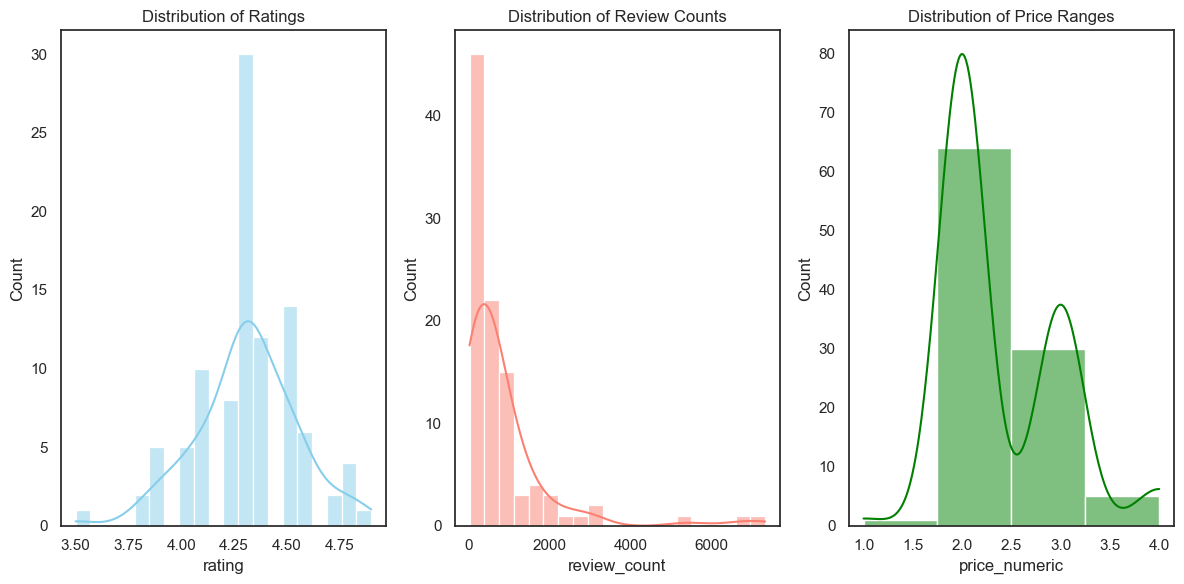

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="white")

# Plot histograms and density plots for numerical variables
plt.figure(figsize=(12, 6))

# Histogram for ratings
plt.subplot(1, 3, 1)
sns.histplot(df['rating'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Ratings')

# Histogram for review counts
plt.subplot(1, 3, 2)
sns.histplot(df['review_count'], kde=True, color='salmon', bins=20)
plt.title('Distribution of Review Counts')

# Histogram for price ranges
plt.subplot(1, 3, 3)
sns.histplot(df['price_numeric'], kde=True, color='green', bins=4)
plt.title('Distribution of Price Ranges')

plt.tight_layout()
plt.show()


### Scatter Plots

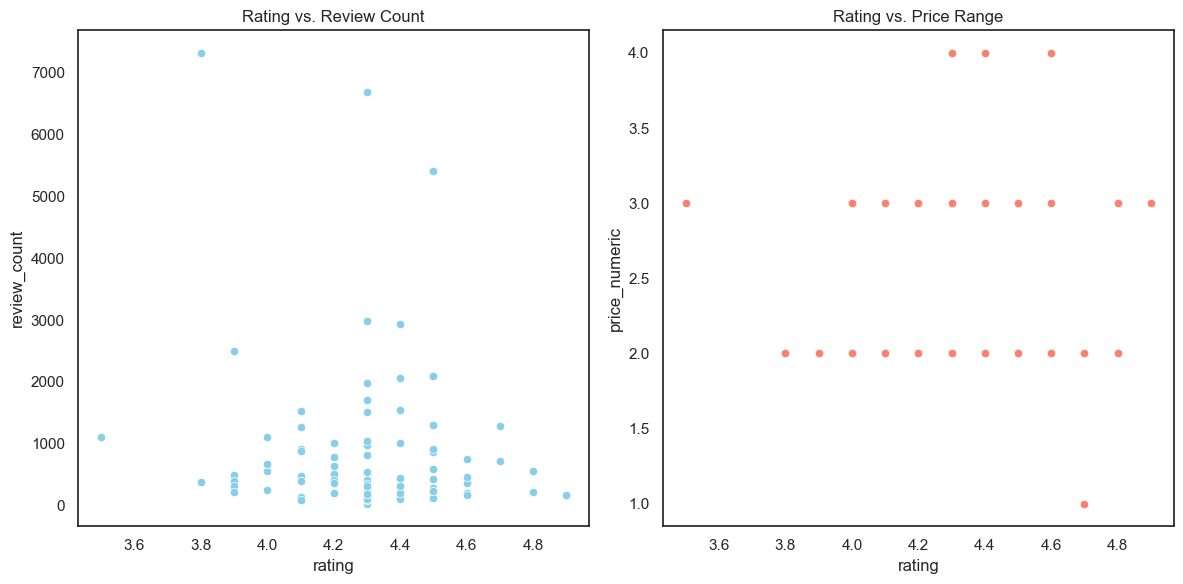

In [105]:
# Set the style of seaborn
sns.set(style="white")

# Create scatter plots for relationships between numerical variables
plt.figure(figsize=(12, 6))

# Scatter plot for ratings vs. review counts
plt.subplot(1, 2, 1)
sns.scatterplot(x='rating', y='review_count', data=df, color='skyblue')
plt.title('Rating vs. Review Count')

# Scatter plot for ratings vs. price range
plt.subplot(1, 2, 2)
sns.scatterplot(x='rating', y='price_numeric', data=df, color='salmon')
plt.title('Rating vs. Price Range')

plt.tight_layout()
plt.show()

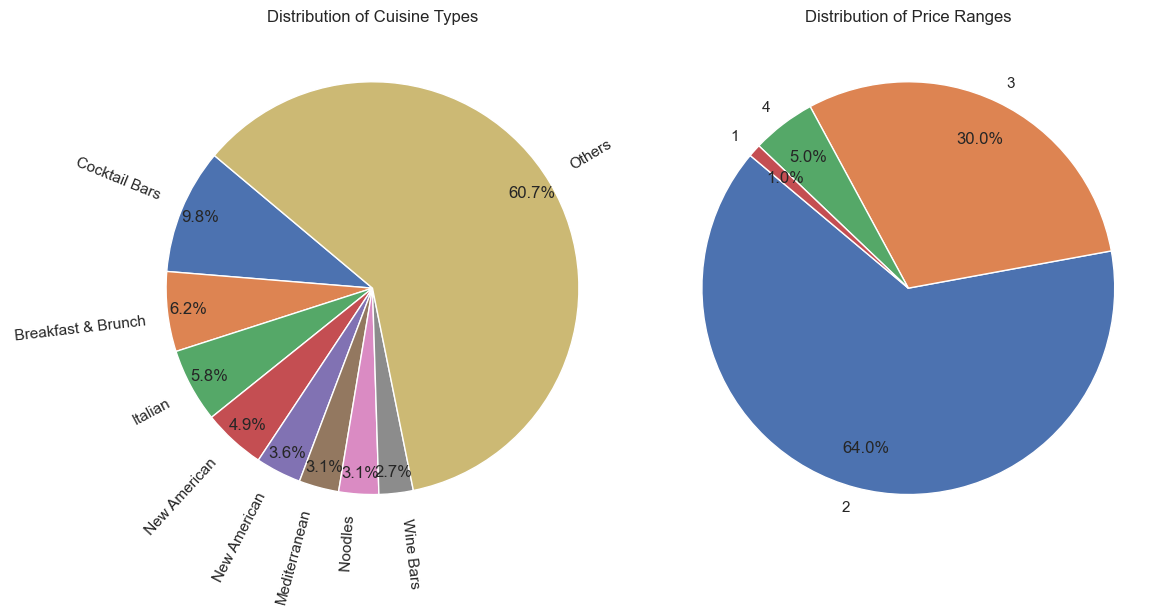

In [107]:
# Split the text in 'cuisine_type' column by comma and strip whitespace
cuisine_types = df['category'].str.split(',').explode()

# Prepare data for the pie chart
cuisine_counts = cuisine_types.value_counts()
price_range_counts = df['price_numeric'].value_counts()
# Get the top 8 most repeated cuisine types
top_cuisine_counts = cuisine_counts.head(8)

# Calculate the count of "Others"
other_count = cuisine_counts.sum() - top_cuisine_counts.sum()

# Combine the top 8 cuisine types and "Others"
top_cuisine_counts['Others'] = other_count

# Plot pie charts for cuisine types and price ranges
plt.figure(figsize=(12, 6))

# Pie chart for cuisine types
plt.subplot(1, 2, 1)
plt.pie(top_cuisine_counts, labels=top_cuisine_counts.index, autopct='%1.1f%%',pctdistance=0.9, startangle=140, rotatelabels=True)
plt.title('Distribution of Cuisine Types')

# Pie chart for price ranges
plt.subplot(1, 2, 2)
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', pctdistance=0.8, startangle=140)
plt.title('Distribution of Price Ranges')

plt.tight_layout()
plt.show()

# Sentiment Analysis

In [108]:
# Make a copy of the data set to process the data for Sentiment Analysis
data = df.copy()

# Explode the 'reviews' column to create a new row for each review
data = data.explode('reviews')

data.head()

,name,price,category,rating,review_count,reviews,price_numeric
0,Olio e Più,$$,"Pizza, Italian, Cocktail Bars",4.5,5411,Friendly service and great food. Perfect for s...,2
0,Olio e Più,$$,"Pizza, Italian, Cocktail Bars",4.5,5411,Some of the BEST carbonara I have ever had out...,2
0,Olio e Più,$$,"Pizza, Italian, Cocktail Bars",4.5,5411,Went here on a Friday night and had the carbon...,2
1,Ye's Apothecary,$$$,"Szechuan, Speakeasies",4.5,598,Perfect date night spot! Went here for Valenti...,3
1,Ye's Apothecary,$$$,"Szechuan, Speakeasies",4.5,598,"Always good food and good baijiu, love it! Rec...",3


In [109]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arreb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arreb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arreb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [110]:
# Preprocessing function
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

# Apply preprocessing to the 'reviews' column
data['preprocessed_reviews'] = data['reviews'].apply(preprocess_text)

print(data[['reviews', 'preprocessed_reviews']])

                                              reviews  \
0   Friendly service and great food. Perfect for s...   
0   Some of the BEST carbonara I have ever had out...   
0   Went here on a Friday night and had the carbon...   
1   Perfect date night spot! Went here for Valenti...   
1   Always good food and good baijiu, love it! Rec...   
..                                                ...   
98  Really enjoyed the pork soup dumplings! They w...   
98  I came in with some friends on a Tuesday night...   
99  falafel and chips great\ngirl at the front is ...   
99  Came here for dinner and had a pleasant experi...   
99  i enjoyed my salmon plate for lunch! It was th...   

                                 preprocessed_reviews  
0   friendly service great food perfect springtime...  
0   best carbonara ever started burrata carpaccio ...  
0   went friday night carbonara carbonara good sil...  
1   perfect date night spot went valentine day dim...  
1   always good food good baijiu lo

In [111]:
# Sentiment analysis function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Define thresholds for sentiment polarity
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the preprocessed text
data['sentiment'] = data['preprocessed_reviews'].apply(analyze_sentiment)

data.head()

,name,price,category,rating,review_count,reviews,price_numeric,preprocessed_reviews,sentiment
0,Olio e Più,$$,"Pizza, Italian, Cocktail Bars",4.5,5411,Friendly service and great food. Perfect for s...,2,friendly service great food perfect springtime...,Positive
0,Olio e Più,$$,"Pizza, Italian, Cocktail Bars",4.5,5411,Some of the BEST carbonara I have ever had out...,2,best carbonara ever started burrata carpaccio ...,Positive
0,Olio e Più,$$,"Pizza, Italian, Cocktail Bars",4.5,5411,Went here on a Friday night and had the carbon...,2,went friday night carbonara carbonara good sil...,Positive
1,Ye's Apothecary,$$$,"Szechuan, Speakeasies",4.5,598,Perfect date night spot! Went here for Valenti...,3,perfect date night spot went valentine day dim...,Positive
1,Ye's Apothecary,$$$,"Szechuan, Speakeasies",4.5,598,"Always good food and good baijiu, love it! Rec...",3,always good food good baijiu love recommend al...,Positive


## Visualizations & Analysis

In [112]:
#pip install wordcloud

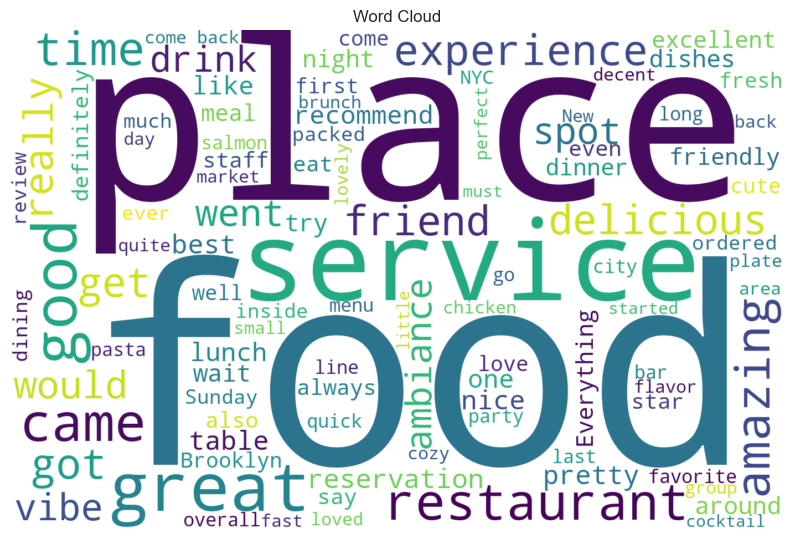

In [121]:
from wordcloud import WordCloud
def filter_words(review):
    stop_words = set(stopwords.words('english'))
    filtered = []
    for reviews in review:
        word_tokens = word_tokenize(reviews)
        for w in word_tokens:
            if w not in stop_words and w.isalpha():
                filtered.append(w)
    return filtered

def plot_wordcloud(review, title, max_words):
    words_filtered = filter_words(review)
    text = " ".join([ele for ele in words_filtered])
    word_cloud = WordCloud(background_color="white", random_state=1, stopwords=stop_words, max_words=max_words, width=1400, height=900)
    word_cloud.generate(text)
    plt.figure(figsize=[10,10])
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()


reviews = data['reviews'].tolist()
plot_wordcloud(reviews, "Word Cloud", max_words=100)

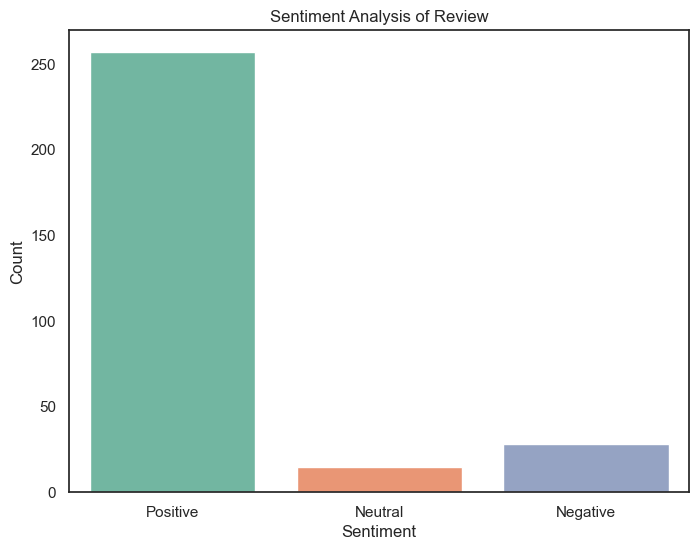

In [114]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sentiment', palette='Set2')
plt.title('Sentiment Analysis of Review')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


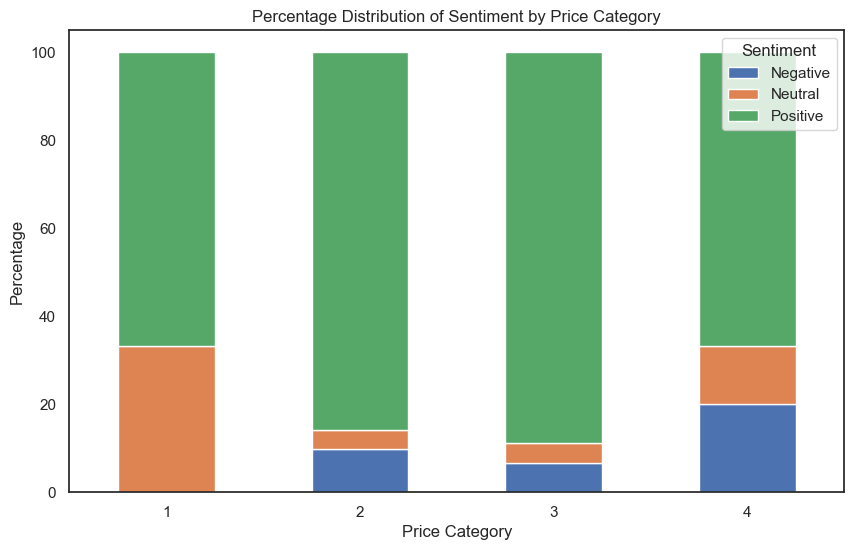

In [115]:
# Count the occurrences of each combination of price and sentiment
counts = data.groupby(['price_numeric', 'sentiment']).size().reset_index(name='count')

# Pivot the DataFrame to have price categories as columns
pivot_counts = counts.pivot(index='price_numeric', columns='sentiment', values='count').fillna(0)

# Stacked percentage bar plot
pivot_counts_perc = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100
pivot_counts_perc.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Price Category')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Sentiment by Price Category')
plt.legend(title='Sentiment')
plt.xticks(rotation=0)
plt.show()


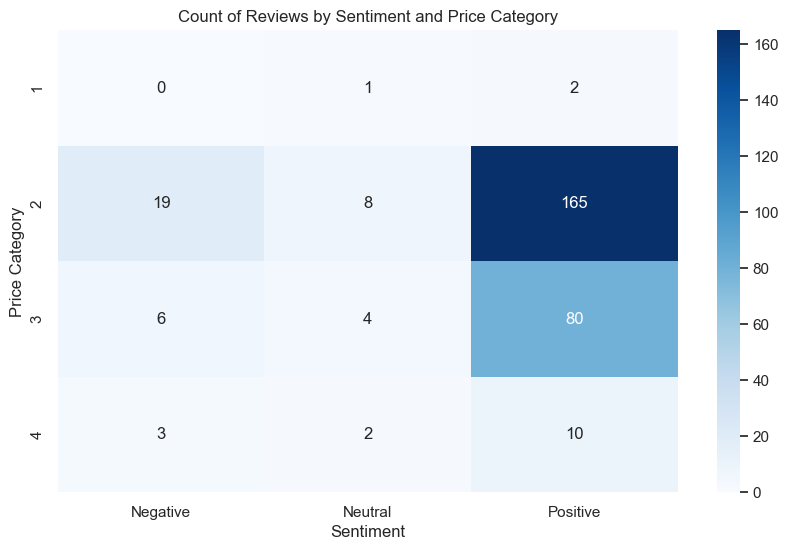

In [116]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_counts, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Sentiment')
plt.ylabel('Price Category')
plt.title('Count of Reviews by Sentiment and Price Category')
plt.show()